# JanataHack: Machine Learning for Banking

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

Variable Definition

Loan_ID  :   A unique id for the loan.

Loan_Amount_Requested  :  The listed amount of the loan applied for by the borrower.

Length_Employed :  Employment length in years

Home_Owner  :  The home ownership status provided by the borrower during registration.
Values are: Rent, Own, Mortgage, Other.

Annual_Income : The annual income provided by the borrower during registration.

Income_Verified : Indicates if income was verified, not verified, or if the income source 
was verified

Purpose_Of_Loan : A category provided by the borrower for the loan request. 

Debt_To_Income : A ratio calculated using the borrower’s total monthly debt payments on
the total debt obligations, excluding mortgage and the requested loan, divided by the 
borrower’s self-reported monthly income.

Inquiries_Last_6Mo : The number of inquiries by creditors during the past 6 months.

Months_Since_Deliquency : The number of months since the borrower's last delinquency.

Number_Open_Accounts : The number of open credit lines in the borrower's credit file.

Total_Accounts : The total number of credit lines currently in the borrower's credit file

Gender : Gender

Interest_Rate  : Target Variable: Interest Rate category (1/2/3) of the loan application

# Evaluation Metric
The evaluation metric for this competition is Weighted F1 Score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score as f1
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import lightgbm as ltb
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the datasets and store in df

train = pd.read_csv('train_fNxu4vz.csv')
test  = pd.read_csv('test_fjtUOL8.csv')
sub   = pd.read_csv('sample_submission_HSqiq1Q.csv')

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [5]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [6]:
test.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
dtype: object

In [7]:
train.shape,test.shape

((164309, 14), (109541, 13))

In [8]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [10]:
train['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [11]:
test['Length_Employed'].value_counts()

10+ years    35413
2 years       9800
3 years       8504
< 1 year      8328
5 years       7228
1 year        6914
4 years       6609
6 years       6257
7 years       6136
8 years       5198
9 years       4218
Name: Length_Employed, dtype: int64

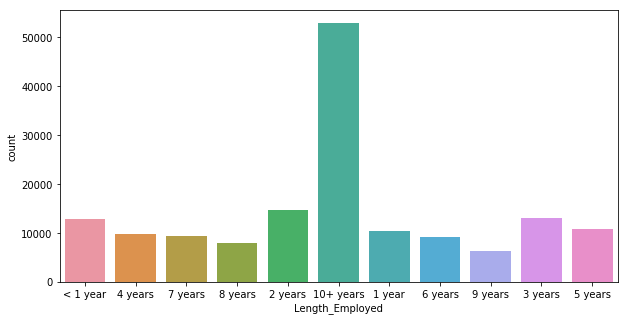

In [12]:
fig = plt.figure(figsize = (10,5))
sns.countplot(train['Length_Employed'])

In [13]:
train['Length_Employed'] = train['Length_Employed'].fillna('10')

In [14]:
test['Length_Employed'] = test['Length_Employed'].fillna('10')

In [15]:
train['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [16]:
test['Home_Owner'].value_counts()

Mortgage    46925
Rent        37511
Own          8354
Other          30
None           10
Name: Home_Owner, dtype: int64

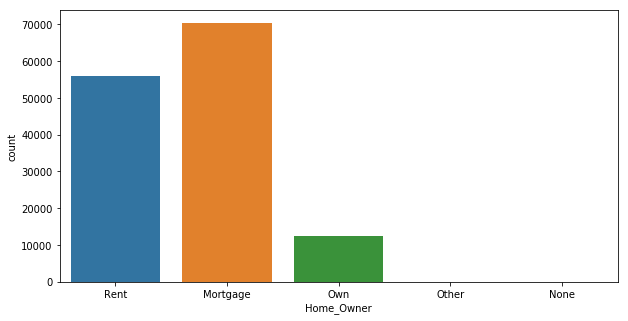

In [17]:
fig = plt.figure(figsize = (10,5))
sns.countplot(train['Home_Owner'])

In [18]:
train['Home_Owner'] = train['Home_Owner'].fillna('Missing')

In [19]:
test['Home_Owner'] = test['Home_Owner'].fillna('Missing')

In [20]:
train['Annual_Income'].value_counts()

60000.00     5462
50000.00     4783
65000.00     4012
40000.00     3856
70000.00     3667
45000.00     3614
75000.00     3434
80000.00     3429
55000.00     3320
90000.00     2637
100000.00    2618
85000.00     2377
35000.00     2350
30000.00     2248
120000.00    1981
42000.00     1905
52000.00     1861
48000.00     1786
110000.00    1581
72000.00     1552
95000.00     1411
36000.00     1215
150000.00    1191
62000.00     1173
38000.00     1165
54000.00     1069
32000.00     1055
58000.00     1047
125000.00    1013
56000.00     1007
             ... 
167900.00       1
20987.00        1
83946.00        1
83940.00        1
23460.00        1
14588.00        1
58349.00        1
38376.00        1
41957.00        1
116736.00       1
58371.00        1
30797.15        1
128922.00       1
84023.00        1
44412.00        1
66664.00        1
29197.00        1
112320.00       1
14597.00        1
58385.00        1
41999.00        1
38299.00        1
68455.14        1
167990.00       1
68255.86  

In [21]:
test['Annual_Income'].value_counts()

60000.00     3513
50000.00     3179
65000.00     2619
40000.00     2530
70000.00     2479
45000.00     2397
80000.00     2322
55000.00     2202
75000.00     2199
90000.00     1773
100000.00    1695
85000.00     1619
35000.00     1562
30000.00     1463
120000.00    1270
42000.00     1264
48000.00     1195
52000.00     1188
110000.00    1143
95000.00      984
72000.00      980
36000.00      897
38000.00      806
62000.00      795
150000.00     752
32000.00      741
68000.00      711
56000.00      709
54000.00      694
58000.00      671
             ... 
37775.00        1
124798.00       1
91936.00        1
75555.00        1
75558.00        1
47008.00        1
31180.00        1
75569.00        1
36069.00        1
45982.00        1
45339.36        1
54176.00        1
20040.00        1
45988.00        1
91977.00        1
62373.00        1
151195.00       1
124750.00       1
92001.00        1
53520.00        1
54195.00        1
46004.00        1
108396.00       1
75633.00        1
54201.00  

In [22]:
train['Annual_Income'] = train['Annual_Income'].fillna(train['Annual_Income'].median())

In [23]:
test['Annual_Income'] = test['Annual_Income'].fillna(test['Annual_Income'].median())

In [24]:
train['Months_Since_Deliquency'].value_counts()

9.0      1518
10.0     1510
14.0     1487
12.0     1484
8.0      1474
6.0      1440
13.0     1436
15.0     1433
7.0      1416
18.0     1390
16.0     1360
20.0     1333
11.0     1327
19.0     1325
17.0     1316
21.0     1297
27.0     1255
23.0     1224
26.0     1189
25.0     1189
22.0     1184
33.0     1156
31.0     1148
28.0     1147
29.0     1127
24.0     1125
30.0     1114
36.0     1104
5.0      1099
35.0     1083
         ... 
97.0        3
99.0        2
94.0        2
135.0       2
102.0       2
93.0        2
105.0       2
92.0        2
90.0        2
116.0       2
101.0       2
110.0       2
114.0       2
131.0       1
129.0       1
107.0       1
98.0        1
127.0       1
141.0       1
122.0       1
119.0       1
111.0       1
180.0       1
139.0       1
95.0        1
103.0       1
121.0       1
148.0       1
170.0       1
130.0       1
Name: Months_Since_Deliquency, Length: 122, dtype: int64

In [25]:
test['Months_Since_Deliquency'].value_counts()

9.0      1067
13.0     1060
8.0      1041
12.0      989
10.0      953
7.0       953
14.0      950
19.0      944
18.0      942
6.0       938
15.0      936
11.0      930
17.0      926
16.0      873
20.0      864
22.0      830
24.0      820
26.0      815
27.0      812
23.0      806
28.0      804
21.0      802
25.0      787
5.0       762
29.0      761
34.0      755
30.0      742
35.0      735
31.0      732
32.0      731
         ... 
86.0        4
95.0        4
96.0        4
88.0        4
92.0        4
90.0        4
91.0        3
89.0        2
85.0        2
101.0       2
87.0        2
97.0        1
99.0        1
103.0       1
124.0       1
143.0       1
140.0       1
93.0        1
106.0       1
149.0       1
135.0       1
118.0       1
94.0        1
115.0       1
133.0       1
122.0       1
109.0       1
126.0       1
130.0       1
131.0       1
Name: Months_Since_Deliquency, Length: 115, dtype: int64

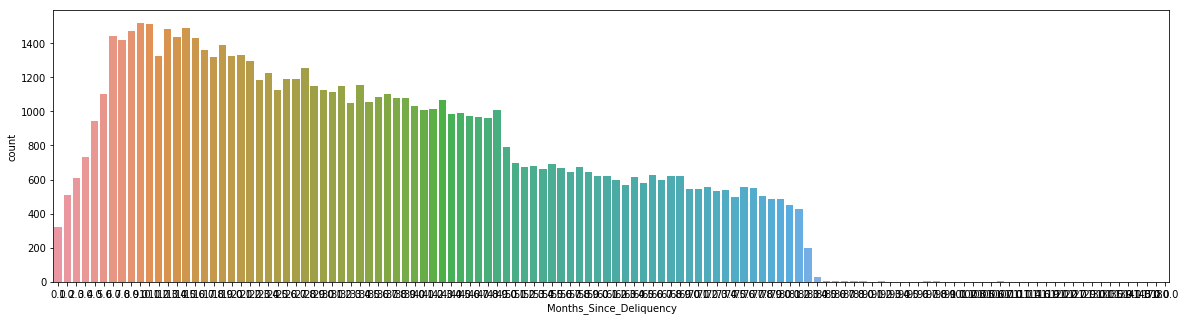

In [26]:
fig = plt.figure(figsize = (20,5))
sns.countplot(train['Months_Since_Deliquency'])

In [27]:
train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].fillna(0.0)

In [28]:
test['Months_Since_Deliquency'] = test['Months_Since_Deliquency'].fillna(0.0)

In [29]:
train['Interest_Rate'].value_counts('normalise')

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

In [104]:
train[train.Interest_Rate == 1]['Interest_Rate'].shape

(33806,)

In [105]:
train[train.Interest_Rate == 2]['Interest_Rate'].shape

(70580,)

In [106]:
train[train.Interest_Rate == 3]['Interest_Rate'].shape

(59923,)

In [107]:
# upsample the minority class to balance the data
from sklearn.utils import resample
df1 = train[train.Interest_Rate ==1]
df2 = train[train.Interest_Rate ==2]
df3 = train[train.Interest_Rate ==3]

df1r = resample(df1,replace=True,n_samples = 70580,random_state = 11)
df3r = resample(df3,replace=True,n_samples = 70580,random_state = 11)

dfus = pd.concat([df2,df1r,df3r])
dfus.Interest_Rate.value_counts()

3    70580
2    70580
1    70580
Name: Interest_Rate, dtype: int64

In [108]:
dfus = dfus.sort_index()

In [30]:
def rlatf(s) :    # convert the requested loan amount to float from object
    fv = s.split(',')
    if len(fv) >1 :
        return float(fv[0]+fv[1])
    else :
        return float(fv[0])

In [110]:
#Balanced class dataset
dfus['Loan_Amount_Requested'] = dfus['Loan_Amount_Requested'].apply(lambda x : rlatf(x))

In [31]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].apply(lambda x : rlatf(x))

In [32]:
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].apply(lambda x : rlatf(x))

In [108]:
dfus.Loan_Amount_Requested.head()

0     7000.0
0     7000.0
1    30000.0
2    24725.0
2    24725.0
Name: Loan_Amount_Requested, dtype: float64

In [34]:
train.Loan_Amount_Requested.head()

0     7000.0
1    30000.0
2    24725.0
3    16000.0
4    17000.0
Name: Loan_Amount_Requested, dtype: float64

In [35]:
test.Loan_Amount_Requested.head()

0    27500.0
1    26000.0
2     6075.0
3    12000.0
4    35000.0
Name: Loan_Amount_Requested, dtype: float64

In [109]:
dfus.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [36]:
train.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [37]:
test.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [38]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested      float64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [39]:
test.dtypes

Loan_ID                      int64
Loan_Amount_Requested      float64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
dtype: object

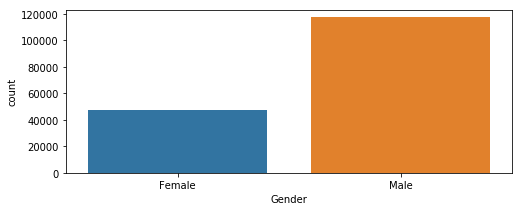

In [39]:
fig = plt.figure(figsize = (8,3))
sns.countplot(train.Gender)

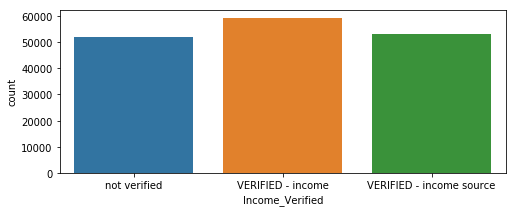

In [40]:
fig = plt.figure(figsize = (8,3))
sns.countplot(train.Income_Verified)

In [157]:
train.Income_Verified.value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

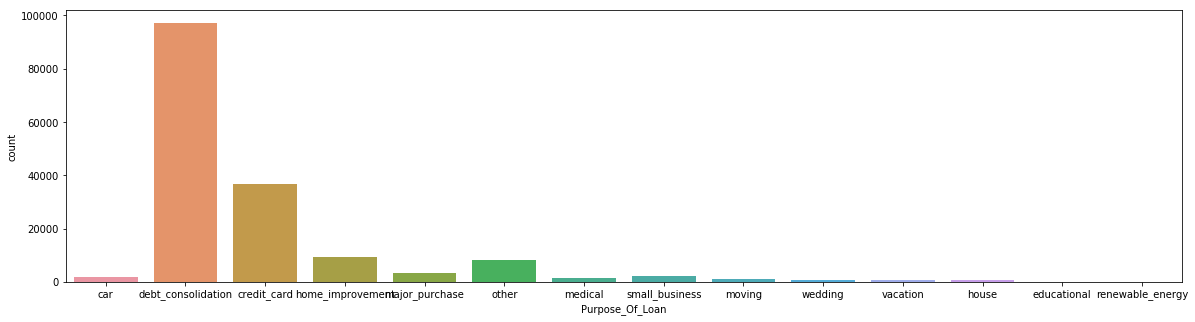

In [41]:
fig = plt.figure(figsize = (20,5))
sns.countplot(train.Purpose_Of_Loan)

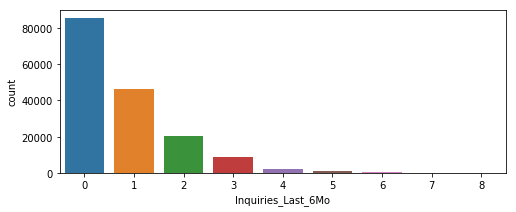

In [42]:
fig = plt.figure(figsize = (8,3))
sns.countplot(train.Inquiries_Last_6Mo)

In [112]:
dfus = pd.get_dummies(dfus)
dfus.shape

(211740, 46)

In [33]:
train = pd.get_dummies(train)
train.shape

(164309, 46)

In [34]:
test = pd.get_dummies(test)
test.shape

(109541, 45)

In [35]:
train.head(2)

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Length_Employed_1 year,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10000001,7000.0,68000.0,18.37,0,0.0,9,14,1,0,...,0,0,0,0,0,0,0,0,1,0
1,10000002,30000.0,63000.0,14.93,0,17.0,12,24,3,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
test.head(2)

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10164310,27500.0,129000.0,12.87,0,68.0,10,37,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10164311,26000.0,110000.0,11.37,0,0.0,6,23,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
train.Interest_Rate.value_counts('normalise')

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

In [40]:
dfus.Interest_Rate.value_counts('normalise')

3    0.333333
2    0.333333
1    0.333333
Name: Interest_Rate, dtype: float64

In [112]:
dfus.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate', 'Length_Employed_1 year',
       'Length_Employed_10', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_< 1 year', 'Home_Owner_Missing', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
  

In [44]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate', 'Length_Employed_1 year',
       'Length_Employed_10', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_< 1 year', 'Home_Owner_Missing', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
  

In [45]:
test.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Length_Employed_1 year', 'Length_Employed_10',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_< 1 year',
       'Home_Owner_Missing', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_

In [114]:
X = dfus.drop(columns = ['Loan_ID','Interest_Rate'])
y = dfus['Interest_Rate']

In [164]:
cols_train = ['Loan_ID','Interest_Rate','Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male']


cols_test = ['Loan_ID','Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male']

In [171]:
X = train.drop(columns = cols_train)
X_test = test.drop(columns = cols_test)
y = train['Interest_Rate']

In [37]:
X = train.drop(columns = ['Loan_ID','Interest_Rate'])
y = train['Interest_Rate']

In [128]:
# Droping Months_Since_Deliquency column as it has 50% NAN values
X = train.drop(columns = ['Loan_ID','Months_Since_Deliquency','Interest_Rate'])

In [38]:
X_test = test.drop(columns = 'Loan_ID')

In [129]:
# Droping Months_Since_Deliquency column as it has 50% NAN values
X_test = test.drop(columns = ['Loan_ID','Months_Since_Deliquency'])

In [39]:
X , y = np.array(X), np.array(y)

In [40]:
X_test = np.array(X_test)

In [41]:
X

array([[7.00000e+03, 6.80000e+04, 1.83700e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [3.00000e+04, 6.30000e+04, 1.49300e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.47250e+04, 7.55664e+04, 1.58800e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.02500e+04, 6.30000e+04, 1.81700e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+04, 6.30000e+04, 1.87500e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.25000e+03, 6.30000e+04, 1.94400e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [42]:
X_test

array([[2.750e+04, 1.290e+05, 1.287e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.600e+04, 1.100e+05, 1.137e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.075e+03, 7.500e+04, 6.830e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.000e+03, 3.785e+04, 1.160e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.125e+03, 3.000e+04, 2.488e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.500e+04, 1.370e+05, 8.660e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [43]:
y

array([1, 3, 3, ..., 1, 3, 2], dtype=int64)

In [44]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state= 42,stratify =y)

In [44]:
# keep 30% in validation
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.30,random_state= 42,stratify =y)

In [45]:
X_train.shape,X_val.shape  # validation 25%

((123231, 44), (41078, 44))

In [45]:
X_train.shape,X_val.shape  # validation 30%

((115016, 44), (49293, 44))

In [122]:
X_train.shape,X_val.shape  # validation 30% for up sampled dataset

((148218, 44), (63522, 44))

In [68]:
st = MinMaxScaler()
X_train_scale = st.fit_transform(X_train)
X_val_scale   = st.fit_transform(X_val)
X_test_scale  = st.fit_transform(X_test)

In [51]:
X_train_scale

array([[0.27536232, 0.01547492, 0.14853713, ..., 0.        , 1.        ,
        0.        ],
       [0.27536232, 0.00760406, 0.38609652, ..., 0.        , 1.        ,
        0.        ],
       [0.42028986, 0.00787086, 0.47211803, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.00787086, 0.40010003, ..., 0.        , 1.        ,
        0.        ],
       [0.56521739, 0.00947172, 0.36334084, ..., 0.        , 0.        ,
        1.        ],
       [0.4615942 , 0.00506937, 0.68942236, ..., 0.        , 1.        ,
        0.        ]])

In [52]:
X_test_scale

array([[0.7826087 , 0.01692776, 0.32183046, ..., 0.        , 0.        ,
        1.        ],
       [0.73913043, 0.01437516, 0.28432108, ..., 0.        , 0.        ,
        1.        ],
       [0.1615942 , 0.00967301, 0.1707927 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.04347826, 0.004682  , 0.29007252, ..., 0.        , 0.        ,
        1.        ],
       [0.04710145, 0.00362738, 0.62215554, ..., 0.        , 0.        ,
        1.        ],
       [0.42028986, 0.01800254, 0.21655414, ..., 0.        , 0.        ,
        1.        ]])

In [53]:
y_train

array([2, 3, 3, ..., 1, 3, 3], dtype=int64)

In [58]:
COMP = np.linspace(.80,.99,5)
COMP

array([0.8   , 0.8475, 0.895 , 0.9425, 0.99  ])

In [61]:
# test with PCA analysis
def lrpca(clf,X_train,y_train,X_val,y_val) :
    nc_score = {}
    
    for comp in COMP :
        pca = PCA(comp)
        pca.fit(X_train)
        train_pca = pca.transform(X_train)
        val_pca   = pca.transform(X_val)
        _,f1s = testforclassifiers(eval(clf),train_pca,y_train,val_pca,0,0)
        #clf.fit(train_pca,y_train)
        #pred = clf.predict(val_pca)
        #f1s = f1(y_val,pred,average ='weighted')
        nc_score[pca.n_components_]  = [comp,f1s]
        
    cldf = pd.DataFrame.from_dict(nc_score,orient='index')
    cldf.columns = ['Comp_Percent','Score']
    
    sns.lineplot(cldf.index,cldf.Score)
    return cldf 

,Comp_Percent,Score
1,0.9425,0.360548
2,0.9900,0.421030


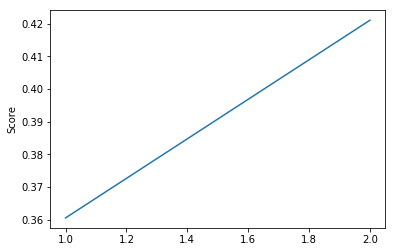

In [65]:
lrpca('ltb.LGBMClassifier()',X_train,y_train,X_val,y_val)

In [63]:
# if mo = 0 OnevsRestClassifier
#    m0 > 0 OnevsOneClassifier 
def testforclassifiers(clf,arr1,arr2,arr3,mo,vt) :
    if mo == 0 :
        prediction = OneVsRestClassifier(clf).fit(arr1,arr2).predict(arr3)
        if vt == 0 :
            f1_score   = f1(y_val,prediction,average ='weighted')
    else :
        prediction = OneVsOneClassifier(clf).fit(arr1,arr2).predict(arr3)
        if vt == 0 :
            f1_score   = f1(y_val,prediction,average ='weighted')
            
    if vt == 0 :
        return  prediction,f1_score
    else :
        return prediction

In [124]:
_,f1s = testforclassifiers(LogisticRegression(),X_train,y_train,X_val,0,0)
f1s

0.4058196122391771

In [138]:
lrp = testforclassifiers(LogisticRegression(),X_train,y_train,X_test,0,1)
lrp

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [139]:
_,f1s = testforclassifiers(MultinomialNB(),X_train,y_train,X_val,0,0)
f1s

0.3968419685078769

In [140]:
nbp = testforclassifiers(MultinomialNB(),X_train,y_train,X_test,0,1)
nbp

array([3, 3, 2, ..., 2, 2, 2], dtype=int64)

In [56]:
_,f1s = testforclassifiers(GaussianNB(),X_train_scale,y_train,X_val_scale,0,0)
f1s

0.42282428358352825

In [142]:
f1s = testforclassifiers(GaussianNB(),X_train,y_train,X_test,0,1)
nbgp

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [58]:
_,f1s = testforclassifiers(RandomForestClassifier(),
                           X_train,y_train,X_val,0,0)
f1s

0.5047171939097628

In [156]:
rfp = testforclassifiers(RandomForestClassifier(),
                         X_train,y_train,X_test,0,1)
rfp

array([2, 1, 3, ..., 2, 3, 2], dtype=int64)

In [59]:
_,f1s = testforclassifiers(XGBClassifier(),
                           X_train,y_train,X_val,0,0)
f1s

0.5114037706221946

In [60]:
xgp = testforclassifiers(XGBClassifier(),
                           X_train,y_train,X_test,0,1)
xgp

array([2, 1, 2, ..., 2, 3, 2], dtype=int64)

In [159]:
_,f1s = testforclassifiers(CatBoostClassifier(),X_train,y_train,X_val,0,0) 
f1s

Learning rate set to 0.078141
0:	learn: 0.6538840	total: 70.9ms	remaining: 1m 10s
1:	learn: 0.6221569	total: 125ms	remaining: 1m 2s
2:	learn: 0.5958967	total: 188ms	remaining: 1m 2s
3:	learn: 0.5739571	total: 257ms	remaining: 1m 3s
4:	learn: 0.5552733	total: 305ms	remaining: 1m
5:	learn: 0.5401142	total: 359ms	remaining: 59.5s
6:	learn: 0.5287327	total: 416ms	remaining: 59s
7:	learn: 0.5182491	total: 495ms	remaining: 1m 1s
8:	learn: 0.5084180	total: 549ms	remaining: 1m
9:	learn: 0.5002531	total: 600ms	remaining: 59.4s
10:	learn: 0.4938466	total: 655ms	remaining: 58.9s
11:	learn: 0.4875122	total: 710ms	remaining: 58.4s
12:	learn: 0.4829080	total: 765ms	remaining: 58.1s
13:	learn: 0.4785441	total: 833ms	remaining: 58.7s
14:	learn: 0.4750748	total: 885ms	remaining: 58.1s
15:	learn: 0.4718707	total: 969ms	remaining: 59.6s
16:	learn: 0.4689724	total: 1.02s	remaining: 58.9s
17:	learn: 0.4665513	total: 1.07s	remaining: 58.2s
18:	learn: 0.4645010	total: 1.11s	remaining: 57.6s
19:	learn: 0.4623

163:	learn: 0.4284972	total: 9.18s	remaining: 46.8s
164:	learn: 0.4284054	total: 9.25s	remaining: 46.8s
165:	learn: 0.4283339	total: 9.3s	remaining: 46.7s
166:	learn: 0.4282518	total: 9.36s	remaining: 46.7s
167:	learn: 0.4281818	total: 9.41s	remaining: 46.6s
168:	learn: 0.4280904	total: 9.47s	remaining: 46.6s
169:	learn: 0.4280098	total: 9.53s	remaining: 46.5s
170:	learn: 0.4279499	total: 9.59s	remaining: 46.5s
171:	learn: 0.4278514	total: 9.65s	remaining: 46.5s
172:	learn: 0.4277739	total: 9.71s	remaining: 46.4s
173:	learn: 0.4276961	total: 9.76s	remaining: 46.4s
174:	learn: 0.4276449	total: 9.82s	remaining: 46.3s
175:	learn: 0.4275714	total: 9.88s	remaining: 46.3s
176:	learn: 0.4274717	total: 9.94s	remaining: 46.2s
177:	learn: 0.4274113	total: 10s	remaining: 46.2s
178:	learn: 0.4273375	total: 10.1s	remaining: 46.1s
179:	learn: 0.4272652	total: 10.1s	remaining: 46.1s
180:	learn: 0.4272055	total: 10.2s	remaining: 46.1s
181:	learn: 0.4271219	total: 10.2s	remaining: 46.1s
182:	learn: 0.4

324:	learn: 0.4190526	total: 18.6s	remaining: 38.6s
325:	learn: 0.4190061	total: 18.7s	remaining: 38.6s
326:	learn: 0.4189549	total: 18.7s	remaining: 38.5s
327:	learn: 0.4188972	total: 18.8s	remaining: 38.5s
328:	learn: 0.4188314	total: 18.8s	remaining: 38.4s
329:	learn: 0.4187951	total: 18.9s	remaining: 38.3s
330:	learn: 0.4187330	total: 18.9s	remaining: 38.3s
331:	learn: 0.4186926	total: 19s	remaining: 38.2s
332:	learn: 0.4186904	total: 19s	remaining: 38.1s
333:	learn: 0.4186407	total: 19.1s	remaining: 38.1s
334:	learn: 0.4185885	total: 19.2s	remaining: 38s
335:	learn: 0.4185476	total: 19.2s	remaining: 38s
336:	learn: 0.4184967	total: 19.3s	remaining: 37.9s
337:	learn: 0.4184479	total: 19.3s	remaining: 37.9s
338:	learn: 0.4184111	total: 19.4s	remaining: 37.8s
339:	learn: 0.4183497	total: 19.4s	remaining: 37.7s
340:	learn: 0.4182951	total: 19.5s	remaining: 37.7s
341:	learn: 0.4182623	total: 19.6s	remaining: 37.6s
342:	learn: 0.4182081	total: 19.6s	remaining: 37.6s
343:	learn: 0.418158

485:	learn: 0.4122679	total: 27.7s	remaining: 29.3s
486:	learn: 0.4122101	total: 27.8s	remaining: 29.2s
487:	learn: 0.4121657	total: 27.8s	remaining: 29.2s
488:	learn: 0.4121369	total: 27.9s	remaining: 29.1s
489:	learn: 0.4120877	total: 27.9s	remaining: 29.1s
490:	learn: 0.4120515	total: 28s	remaining: 29s
491:	learn: 0.4120210	total: 28.1s	remaining: 29s
492:	learn: 0.4119830	total: 28.1s	remaining: 28.9s
493:	learn: 0.4119497	total: 28.2s	remaining: 28.9s
494:	learn: 0.4119057	total: 28.2s	remaining: 28.8s
495:	learn: 0.4118593	total: 28.3s	remaining: 28.7s
496:	learn: 0.4118199	total: 28.3s	remaining: 28.7s
497:	learn: 0.4117864	total: 28.4s	remaining: 28.6s
498:	learn: 0.4117515	total: 28.5s	remaining: 28.6s
499:	learn: 0.4116994	total: 28.5s	remaining: 28.5s
500:	learn: 0.4116559	total: 28.6s	remaining: 28.5s
501:	learn: 0.4116238	total: 28.6s	remaining: 28.4s
502:	learn: 0.4115989	total: 28.7s	remaining: 28.3s
503:	learn: 0.4115781	total: 28.7s	remaining: 28.3s
504:	learn: 0.4115

646:	learn: 0.4064972	total: 36.8s	remaining: 20.1s
647:	learn: 0.4064567	total: 36.8s	remaining: 20s
648:	learn: 0.4064403	total: 36.9s	remaining: 19.9s
649:	learn: 0.4064048	total: 36.9s	remaining: 19.9s
650:	learn: 0.4063784	total: 37s	remaining: 19.8s
651:	learn: 0.4063436	total: 37.1s	remaining: 19.8s
652:	learn: 0.4062958	total: 37.1s	remaining: 19.7s
653:	learn: 0.4062677	total: 37.2s	remaining: 19.7s
654:	learn: 0.4062256	total: 37.2s	remaining: 19.6s
655:	learn: 0.4062232	total: 37.3s	remaining: 19.6s
656:	learn: 0.4061733	total: 37.3s	remaining: 19.5s
657:	learn: 0.4061455	total: 37.4s	remaining: 19.4s
658:	learn: 0.4061014	total: 37.5s	remaining: 19.4s
659:	learn: 0.4060735	total: 37.5s	remaining: 19.3s
660:	learn: 0.4060507	total: 37.6s	remaining: 19.3s
661:	learn: 0.4060212	total: 37.6s	remaining: 19.2s
662:	learn: 0.4060003	total: 37.7s	remaining: 19.2s
663:	learn: 0.4059582	total: 37.7s	remaining: 19.1s
664:	learn: 0.4059124	total: 37.8s	remaining: 19s
665:	learn: 0.4058

807:	learn: 0.4010519	total: 46s	remaining: 10.9s
808:	learn: 0.4010209	total: 46s	remaining: 10.9s
809:	learn: 0.4010013	total: 46.1s	remaining: 10.8s
810:	learn: 0.4009630	total: 46.1s	remaining: 10.7s
811:	learn: 0.4009328	total: 46.2s	remaining: 10.7s
812:	learn: 0.4009011	total: 46.2s	remaining: 10.6s
813:	learn: 0.4008799	total: 46.3s	remaining: 10.6s
814:	learn: 0.4008596	total: 46.4s	remaining: 10.5s
815:	learn: 0.4008368	total: 46.5s	remaining: 10.5s
816:	learn: 0.4008226	total: 46.5s	remaining: 10.4s
817:	learn: 0.4007957	total: 46.6s	remaining: 10.4s
818:	learn: 0.4007648	total: 46.6s	remaining: 10.3s
819:	learn: 0.4007417	total: 46.7s	remaining: 10.3s
820:	learn: 0.4007151	total: 46.8s	remaining: 10.2s
821:	learn: 0.4006918	total: 46.8s	remaining: 10.1s
822:	learn: 0.4006750	total: 46.9s	remaining: 10.1s
823:	learn: 0.4006585	total: 46.9s	remaining: 10s
824:	learn: 0.4006369	total: 47s	remaining: 9.97s
825:	learn: 0.4005814	total: 47.1s	remaining: 9.91s
826:	learn: 0.400537

966:	learn: 0.3964387	total: 55.3s	remaining: 1.89s
967:	learn: 0.3964199	total: 55.3s	remaining: 1.83s
968:	learn: 0.3963861	total: 55.4s	remaining: 1.77s
969:	learn: 0.3963687	total: 55.4s	remaining: 1.71s
970:	learn: 0.3963294	total: 55.5s	remaining: 1.66s
971:	learn: 0.3963181	total: 55.6s	remaining: 1.6s
972:	learn: 0.3962924	total: 55.6s	remaining: 1.54s
973:	learn: 0.3962665	total: 55.7s	remaining: 1.49s
974:	learn: 0.3962343	total: 55.7s	remaining: 1.43s
975:	learn: 0.3962149	total: 55.8s	remaining: 1.37s
976:	learn: 0.3961895	total: 55.8s	remaining: 1.31s
977:	learn: 0.3961801	total: 55.9s	remaining: 1.26s
978:	learn: 0.3961517	total: 55.9s	remaining: 1.2s
979:	learn: 0.3961203	total: 56s	remaining: 1.14s
980:	learn: 0.3960869	total: 56.1s	remaining: 1.08s
981:	learn: 0.3960623	total: 56.1s	remaining: 1.03s
982:	learn: 0.3960200	total: 56.2s	remaining: 972ms
983:	learn: 0.3960013	total: 56.3s	remaining: 915ms
984:	learn: 0.3959922	total: 56.3s	remaining: 858ms
985:	learn: 0.39

127:	learn: 0.6589034	total: 7.62s	remaining: 51.9s
128:	learn: 0.6588594	total: 7.67s	remaining: 51.8s
129:	learn: 0.6588094	total: 7.72s	remaining: 51.7s
130:	learn: 0.6587639	total: 7.78s	remaining: 51.6s
131:	learn: 0.6587258	total: 7.84s	remaining: 51.5s
132:	learn: 0.6586827	total: 7.89s	remaining: 51.4s
133:	learn: 0.6586427	total: 7.94s	remaining: 51.3s
134:	learn: 0.6585740	total: 8s	remaining: 51.3s
135:	learn: 0.6585139	total: 8.06s	remaining: 51.2s
136:	learn: 0.6584794	total: 8.11s	remaining: 51.1s
137:	learn: 0.6584383	total: 8.16s	remaining: 51s
138:	learn: 0.6583833	total: 8.22s	remaining: 50.9s
139:	learn: 0.6583153	total: 8.28s	remaining: 50.9s
140:	learn: 0.6582368	total: 8.34s	remaining: 50.8s
141:	learn: 0.6581768	total: 8.39s	remaining: 50.7s
142:	learn: 0.6581480	total: 8.45s	remaining: 50.6s
143:	learn: 0.6580646	total: 8.51s	remaining: 50.6s
144:	learn: 0.6580509	total: 8.56s	remaining: 50.5s
145:	learn: 0.6579582	total: 8.61s	remaining: 50.4s
146:	learn: 0.657

286:	learn: 0.6502942	total: 16.5s	remaining: 41s
287:	learn: 0.6502342	total: 16.6s	remaining: 40.9s
288:	learn: 0.6501948	total: 16.6s	remaining: 40.9s
289:	learn: 0.6501656	total: 16.7s	remaining: 40.8s
290:	learn: 0.6501100	total: 16.7s	remaining: 40.7s
291:	learn: 0.6500618	total: 16.8s	remaining: 40.7s
292:	learn: 0.6500117	total: 16.8s	remaining: 40.6s
293:	learn: 0.6499572	total: 16.9s	remaining: 40.6s
294:	learn: 0.6499388	total: 16.9s	remaining: 40.5s
295:	learn: 0.6498948	total: 17s	remaining: 40.4s
296:	learn: 0.6498451	total: 17.1s	remaining: 40.4s
297:	learn: 0.6497826	total: 17.1s	remaining: 40.3s
298:	learn: 0.6497170	total: 17.2s	remaining: 40.2s
299:	learn: 0.6496721	total: 17.2s	remaining: 40.2s
300:	learn: 0.6496416	total: 17.3s	remaining: 40.1s
301:	learn: 0.6496135	total: 17.3s	remaining: 40.1s
302:	learn: 0.6495613	total: 17.4s	remaining: 40s
303:	learn: 0.6495233	total: 17.4s	remaining: 39.9s
304:	learn: 0.6494868	total: 17.5s	remaining: 39.9s
305:	learn: 0.6494

447:	learn: 0.6437830	total: 25.6s	remaining: 31.5s
448:	learn: 0.6437499	total: 25.6s	remaining: 31.4s
449:	learn: 0.6437245	total: 25.7s	remaining: 31.4s
450:	learn: 0.6436677	total: 25.7s	remaining: 31.3s
451:	learn: 0.6436554	total: 25.8s	remaining: 31.2s
452:	learn: 0.6436301	total: 25.8s	remaining: 31.2s
453:	learn: 0.6436031	total: 25.9s	remaining: 31.1s
454:	learn: 0.6435671	total: 25.9s	remaining: 31.1s
455:	learn: 0.6435239	total: 26s	remaining: 31s
456:	learn: 0.6434900	total: 26.1s	remaining: 31s
457:	learn: 0.6434425	total: 26.1s	remaining: 30.9s
458:	learn: 0.6433823	total: 26.2s	remaining: 30.8s
459:	learn: 0.6433430	total: 26.2s	remaining: 30.8s
460:	learn: 0.6433176	total: 26.3s	remaining: 30.7s
461:	learn: 0.6432738	total: 26.3s	remaining: 30.7s
462:	learn: 0.6432303	total: 26.4s	remaining: 30.6s
463:	learn: 0.6432027	total: 26.5s	remaining: 30.6s
464:	learn: 0.6431525	total: 26.5s	remaining: 30.5s
465:	learn: 0.6430995	total: 26.6s	remaining: 30.4s
466:	learn: 0.6430

606:	learn: 0.6380519	total: 35s	remaining: 22.7s
607:	learn: 0.6380132	total: 35.1s	remaining: 22.6s
608:	learn: 0.6379778	total: 35.1s	remaining: 22.6s
609:	learn: 0.6379436	total: 35.2s	remaining: 22.5s
610:	learn: 0.6379027	total: 35.3s	remaining: 22.4s
611:	learn: 0.6378521	total: 35.3s	remaining: 22.4s
612:	learn: 0.6378226	total: 35.4s	remaining: 22.3s
613:	learn: 0.6377699	total: 35.4s	remaining: 22.3s
614:	learn: 0.6377400	total: 35.5s	remaining: 22.2s
615:	learn: 0.6377215	total: 35.5s	remaining: 22.2s
616:	learn: 0.6376987	total: 35.6s	remaining: 22.1s
617:	learn: 0.6376528	total: 35.7s	remaining: 22s
618:	learn: 0.6376203	total: 35.7s	remaining: 22s
619:	learn: 0.6375932	total: 35.8s	remaining: 21.9s
620:	learn: 0.6375618	total: 35.8s	remaining: 21.9s
621:	learn: 0.6375318	total: 35.9s	remaining: 21.8s
622:	learn: 0.6375132	total: 35.9s	remaining: 21.8s
623:	learn: 0.6374763	total: 36s	remaining: 21.7s
624:	learn: 0.6374246	total: 36.1s	remaining: 21.6s
625:	learn: 0.637385

766:	learn: 0.6329095	total: 44s	remaining: 13.4s
767:	learn: 0.6328724	total: 44.1s	remaining: 13.3s
768:	learn: 0.6328286	total: 44.1s	remaining: 13.3s
769:	learn: 0.6327921	total: 44.3s	remaining: 13.2s
770:	learn: 0.6327732	total: 44.3s	remaining: 13.2s
771:	learn: 0.6327527	total: 44.4s	remaining: 13.1s
772:	learn: 0.6327276	total: 44.4s	remaining: 13s
773:	learn: 0.6326879	total: 44.5s	remaining: 13s
774:	learn: 0.6326632	total: 44.6s	remaining: 12.9s
775:	learn: 0.6326196	total: 44.6s	remaining: 12.9s
776:	learn: 0.6326073	total: 44.7s	remaining: 12.8s
777:	learn: 0.6325813	total: 44.7s	remaining: 12.8s
778:	learn: 0.6325540	total: 44.8s	remaining: 12.7s
779:	learn: 0.6325166	total: 44.9s	remaining: 12.7s
780:	learn: 0.6324874	total: 44.9s	remaining: 12.6s
781:	learn: 0.6324707	total: 45s	remaining: 12.5s
782:	learn: 0.6324440	total: 45s	remaining: 12.5s
783:	learn: 0.6324154	total: 45.1s	remaining: 12.4s
784:	learn: 0.6323654	total: 45.2s	remaining: 12.4s
785:	learn: 0.6323228	

928:	learn: 0.6277279	total: 54.1s	remaining: 4.13s
929:	learn: 0.6276953	total: 54.2s	remaining: 4.08s
930:	learn: 0.6276597	total: 54.2s	remaining: 4.02s
931:	learn: 0.6276103	total: 54.3s	remaining: 3.96s
932:	learn: 0.6276036	total: 54.3s	remaining: 3.9s
933:	learn: 0.6275755	total: 54.4s	remaining: 3.84s
934:	learn: 0.6275293	total: 54.5s	remaining: 3.79s
935:	learn: 0.6274971	total: 54.5s	remaining: 3.73s
936:	learn: 0.6274602	total: 54.6s	remaining: 3.67s
937:	learn: 0.6274179	total: 54.6s	remaining: 3.61s
938:	learn: 0.6274025	total: 54.7s	remaining: 3.55s
939:	learn: 0.6273501	total: 54.7s	remaining: 3.49s
940:	learn: 0.6273331	total: 54.8s	remaining: 3.44s
941:	learn: 0.6273000	total: 54.9s	remaining: 3.38s
942:	learn: 0.6272665	total: 54.9s	remaining: 3.32s
943:	learn: 0.6272419	total: 55s	remaining: 3.26s
944:	learn: 0.6272082	total: 55s	remaining: 3.2s
945:	learn: 0.6271734	total: 55.1s	remaining: 3.14s
946:	learn: 0.6271468	total: 55.1s	remaining: 3.08s
947:	learn: 0.6271

90:	learn: 0.5634855	total: 5.03s	remaining: 50.2s
91:	learn: 0.5633504	total: 5.08s	remaining: 50.1s
92:	learn: 0.5632357	total: 5.14s	remaining: 50.1s
93:	learn: 0.5631169	total: 5.19s	remaining: 50s
94:	learn: 0.5630205	total: 5.25s	remaining: 50s
95:	learn: 0.5628764	total: 5.31s	remaining: 50s
96:	learn: 0.5627598	total: 5.36s	remaining: 49.9s
97:	learn: 0.5626640	total: 5.42s	remaining: 49.9s
98:	learn: 0.5625386	total: 5.48s	remaining: 49.9s
99:	learn: 0.5624460	total: 5.53s	remaining: 49.8s
100:	learn: 0.5623380	total: 5.58s	remaining: 49.7s
101:	learn: 0.5622540	total: 5.65s	remaining: 49.7s
102:	learn: 0.5621271	total: 5.71s	remaining: 49.7s
103:	learn: 0.5620107	total: 5.76s	remaining: 49.6s
104:	learn: 0.5618231	total: 5.82s	remaining: 49.6s
105:	learn: 0.5617088	total: 5.87s	remaining: 49.5s
106:	learn: 0.5616144	total: 5.93s	remaining: 49.5s
107:	learn: 0.5614970	total: 5.98s	remaining: 49.4s
108:	learn: 0.5613752	total: 6.04s	remaining: 49.3s
109:	learn: 0.5612282	total:

250:	learn: 0.5491083	total: 14s	remaining: 41.9s
251:	learn: 0.5490458	total: 14.1s	remaining: 41.8s
252:	learn: 0.5489906	total: 14.1s	remaining: 41.8s
253:	learn: 0.5489256	total: 14.2s	remaining: 41.7s
254:	learn: 0.5488422	total: 14.3s	remaining: 41.7s
255:	learn: 0.5487944	total: 14.3s	remaining: 41.6s
256:	learn: 0.5487409	total: 14.4s	remaining: 41.6s
257:	learn: 0.5486827	total: 14.4s	remaining: 41.5s
258:	learn: 0.5486292	total: 14.5s	remaining: 41.5s
259:	learn: 0.5485733	total: 14.5s	remaining: 41.4s
260:	learn: 0.5485260	total: 14.6s	remaining: 41.3s
261:	learn: 0.5484606	total: 14.7s	remaining: 41.3s
262:	learn: 0.5483983	total: 14.7s	remaining: 41.2s
263:	learn: 0.5483346	total: 14.8s	remaining: 41.2s
264:	learn: 0.5482782	total: 14.8s	remaining: 41.1s
265:	learn: 0.5482129	total: 14.9s	remaining: 41.1s
266:	learn: 0.5481523	total: 14.9s	remaining: 41s
267:	learn: 0.5480785	total: 15s	remaining: 41s
268:	learn: 0.5480125	total: 15.1s	remaining: 40.9s
269:	learn: 0.547955

412:	learn: 0.5397980	total: 23.2s	remaining: 33s
413:	learn: 0.5397399	total: 23.3s	remaining: 33s
414:	learn: 0.5396752	total: 23.4s	remaining: 32.9s
415:	learn: 0.5396267	total: 23.4s	remaining: 32.9s
416:	learn: 0.5395927	total: 23.5s	remaining: 32.8s
417:	learn: 0.5395566	total: 23.5s	remaining: 32.8s
418:	learn: 0.5395017	total: 23.6s	remaining: 32.7s
419:	learn: 0.5394590	total: 23.7s	remaining: 32.7s
420:	learn: 0.5394060	total: 23.7s	remaining: 32.6s
421:	learn: 0.5393279	total: 23.8s	remaining: 32.6s
422:	learn: 0.5392872	total: 23.8s	remaining: 32.5s
423:	learn: 0.5392417	total: 23.9s	remaining: 32.5s
424:	learn: 0.5391820	total: 23.9s	remaining: 32.4s
425:	learn: 0.5391463	total: 24s	remaining: 32.3s
426:	learn: 0.5391020	total: 24.1s	remaining: 32.3s
427:	learn: 0.5390645	total: 24.1s	remaining: 32.2s
428:	learn: 0.5390140	total: 24.2s	remaining: 32.2s
429:	learn: 0.5389873	total: 24.2s	remaining: 32.1s
430:	learn: 0.5389419	total: 24.3s	remaining: 32.1s
431:	learn: 0.5388

572:	learn: 0.5326398	total: 32.8s	remaining: 24.4s
573:	learn: 0.5325945	total: 32.8s	remaining: 24.4s
574:	learn: 0.5325635	total: 32.9s	remaining: 24.3s
575:	learn: 0.5325267	total: 32.9s	remaining: 24.3s
576:	learn: 0.5324960	total: 33s	remaining: 24.2s
577:	learn: 0.5324457	total: 33.1s	remaining: 24.1s
578:	learn: 0.5324089	total: 33.1s	remaining: 24.1s
579:	learn: 0.5323688	total: 33.2s	remaining: 24s
580:	learn: 0.5323320	total: 33.2s	remaining: 24s
581:	learn: 0.5322956	total: 33.3s	remaining: 23.9s
582:	learn: 0.5322456	total: 33.3s	remaining: 23.9s
583:	learn: 0.5322139	total: 33.4s	remaining: 23.8s
584:	learn: 0.5321731	total: 33.5s	remaining: 23.7s
585:	learn: 0.5321231	total: 33.5s	remaining: 23.7s
586:	learn: 0.5320785	total: 33.6s	remaining: 23.6s
587:	learn: 0.5320326	total: 33.6s	remaining: 23.6s
588:	learn: 0.5319857	total: 33.7s	remaining: 23.5s
589:	learn: 0.5319503	total: 33.7s	remaining: 23.5s
590:	learn: 0.5319093	total: 33.8s	remaining: 23.4s
591:	learn: 0.5318

734:	learn: 0.5262406	total: 42s	remaining: 15.2s
735:	learn: 0.5261723	total: 42.1s	remaining: 15.1s
736:	learn: 0.5261600	total: 42.1s	remaining: 15s
737:	learn: 0.5261167	total: 42.2s	remaining: 15s
738:	learn: 0.5260969	total: 42.2s	remaining: 14.9s
739:	learn: 0.5260583	total: 42.3s	remaining: 14.9s
740:	learn: 0.5260191	total: 42.4s	remaining: 14.8s
741:	learn: 0.5259693	total: 42.4s	remaining: 14.7s
742:	learn: 0.5259298	total: 42.5s	remaining: 14.7s
743:	learn: 0.5258847	total: 42.5s	remaining: 14.6s
744:	learn: 0.5258570	total: 42.6s	remaining: 14.6s
745:	learn: 0.5258267	total: 42.6s	remaining: 14.5s
746:	learn: 0.5257928	total: 42.7s	remaining: 14.5s
747:	learn: 0.5257581	total: 42.8s	remaining: 14.4s
748:	learn: 0.5257003	total: 42.8s	remaining: 14.3s
749:	learn: 0.5256666	total: 42.9s	remaining: 14.3s
750:	learn: 0.5256440	total: 42.9s	remaining: 14.2s
751:	learn: 0.5255934	total: 43s	remaining: 14.2s
752:	learn: 0.5255395	total: 43.1s	remaining: 14.1s
753:	learn: 0.525522

894:	learn: 0.5205738	total: 51.2s	remaining: 6s
895:	learn: 0.5205379	total: 51.2s	remaining: 5.95s
896:	learn: 0.5205074	total: 51.3s	remaining: 5.89s
897:	learn: 0.5204634	total: 51.3s	remaining: 5.83s
898:	learn: 0.5204415	total: 51.4s	remaining: 5.77s
899:	learn: 0.5204096	total: 51.5s	remaining: 5.72s
900:	learn: 0.5203861	total: 51.5s	remaining: 5.66s
901:	learn: 0.5203436	total: 51.6s	remaining: 5.6s
902:	learn: 0.5203099	total: 51.6s	remaining: 5.55s
903:	learn: 0.5202865	total: 51.7s	remaining: 5.49s
904:	learn: 0.5202553	total: 51.7s	remaining: 5.43s
905:	learn: 0.5202072	total: 51.8s	remaining: 5.37s
906:	learn: 0.5201773	total: 51.9s	remaining: 5.32s
907:	learn: 0.5201447	total: 51.9s	remaining: 5.26s
908:	learn: 0.5201057	total: 52s	remaining: 5.2s
909:	learn: 0.5200635	total: 52s	remaining: 5.14s
910:	learn: 0.5200303	total: 52.1s	remaining: 5.09s
911:	learn: 0.5199992	total: 52.1s	remaining: 5.03s
912:	learn: 0.5199722	total: 52.2s	remaining: 4.97s
913:	learn: 0.5199432

0.530002179178196

In [160]:
catp = testforclassifiers(CatBoostClassifier(),X_train,y_train,X_test,0,1) 
catp

Learning rate set to 0.078141
0:	learn: 0.6538840	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.6221569	total: 111ms	remaining: 55.3s
2:	learn: 0.5958967	total: 164ms	remaining: 54.6s
3:	learn: 0.5739571	total: 219ms	remaining: 54.4s
4:	learn: 0.5552733	total: 269ms	remaining: 53.4s
5:	learn: 0.5401142	total: 332ms	remaining: 54.9s
6:	learn: 0.5287327	total: 395ms	remaining: 56.1s
7:	learn: 0.5182491	total: 446ms	remaining: 55.3s
8:	learn: 0.5084180	total: 502ms	remaining: 55.2s
9:	learn: 0.5002531	total: 564ms	remaining: 55.8s
10:	learn: 0.4938466	total: 620ms	remaining: 55.8s
11:	learn: 0.4875122	total: 669ms	remaining: 55.1s
12:	learn: 0.4829080	total: 719ms	remaining: 54.6s
13:	learn: 0.4785441	total: 779ms	remaining: 54.9s
14:	learn: 0.4750748	total: 845ms	remaining: 55.5s
15:	learn: 0.4718707	total: 902ms	remaining: 55.5s
16:	learn: 0.4689724	total: 955ms	remaining: 55.2s
17:	learn: 0.4665513	total: 1.01s	remaining: 55.2s
18:	learn: 0.4645010	total: 1.07s	remaining: 55.3s
19:	learn:

161:	learn: 0.4286752	total: 9.67s	remaining: 50s
162:	learn: 0.4285844	total: 9.75s	remaining: 50.1s
163:	learn: 0.4284972	total: 9.82s	remaining: 50.1s
164:	learn: 0.4284054	total: 9.89s	remaining: 50.1s
165:	learn: 0.4283339	total: 9.96s	remaining: 50.1s
166:	learn: 0.4282518	total: 10s	remaining: 50s
167:	learn: 0.4281818	total: 10.1s	remaining: 49.9s
168:	learn: 0.4280904	total: 10.1s	remaining: 49.8s
169:	learn: 0.4280098	total: 10.2s	remaining: 49.8s
170:	learn: 0.4279499	total: 10.3s	remaining: 49.8s
171:	learn: 0.4278514	total: 10.3s	remaining: 49.8s
172:	learn: 0.4277739	total: 10.4s	remaining: 49.8s
173:	learn: 0.4276961	total: 10.5s	remaining: 49.7s
174:	learn: 0.4276449	total: 10.5s	remaining: 49.6s
175:	learn: 0.4275714	total: 10.6s	remaining: 49.4s
176:	learn: 0.4274717	total: 10.6s	remaining: 49.4s
177:	learn: 0.4274113	total: 10.7s	remaining: 49.4s
178:	learn: 0.4273375	total: 10.8s	remaining: 49.4s
179:	learn: 0.4272652	total: 10.8s	remaining: 49.4s
180:	learn: 0.4272

321:	learn: 0.4191753	total: 19.2s	remaining: 40.5s
322:	learn: 0.4191138	total: 19.3s	remaining: 40.4s
323:	learn: 0.4190599	total: 19.3s	remaining: 40.3s
324:	learn: 0.4190526	total: 19.4s	remaining: 40.3s
325:	learn: 0.4190061	total: 19.5s	remaining: 40.3s
326:	learn: 0.4189549	total: 19.5s	remaining: 40.2s
327:	learn: 0.4188972	total: 19.6s	remaining: 40.1s
328:	learn: 0.4188314	total: 19.6s	remaining: 40.1s
329:	learn: 0.4187951	total: 19.7s	remaining: 40s
330:	learn: 0.4187330	total: 19.8s	remaining: 39.9s
331:	learn: 0.4186926	total: 19.8s	remaining: 39.9s
332:	learn: 0.4186904	total: 19.9s	remaining: 39.8s
333:	learn: 0.4186407	total: 19.9s	remaining: 39.7s
334:	learn: 0.4185885	total: 20s	remaining: 39.6s
335:	learn: 0.4185476	total: 20s	remaining: 39.6s
336:	learn: 0.4184967	total: 20.1s	remaining: 39.5s
337:	learn: 0.4184479	total: 20.2s	remaining: 39.5s
338:	learn: 0.4184111	total: 20.2s	remaining: 39.4s
339:	learn: 0.4183497	total: 20.3s	remaining: 39.3s
340:	learn: 0.4182

482:	learn: 0.4123869	total: 28.8s	remaining: 30.8s
483:	learn: 0.4123468	total: 28.8s	remaining: 30.7s
484:	learn: 0.4123018	total: 28.9s	remaining: 30.7s
485:	learn: 0.4122679	total: 28.9s	remaining: 30.6s
486:	learn: 0.4122101	total: 29s	remaining: 30.5s
487:	learn: 0.4121657	total: 29.1s	remaining: 30.5s
488:	learn: 0.4121369	total: 29.1s	remaining: 30.4s
489:	learn: 0.4120877	total: 29.2s	remaining: 30.4s
490:	learn: 0.4120515	total: 29.2s	remaining: 30.3s
491:	learn: 0.4120210	total: 29.3s	remaining: 30.2s
492:	learn: 0.4119830	total: 29.3s	remaining: 30.2s
493:	learn: 0.4119497	total: 29.4s	remaining: 30.1s
494:	learn: 0.4119057	total: 29.5s	remaining: 30s
495:	learn: 0.4118593	total: 29.5s	remaining: 30s
496:	learn: 0.4118199	total: 29.6s	remaining: 29.9s
497:	learn: 0.4117864	total: 29.6s	remaining: 29.9s
498:	learn: 0.4117515	total: 29.7s	remaining: 29.8s
499:	learn: 0.4116994	total: 29.7s	remaining: 29.7s
500:	learn: 0.4116559	total: 29.8s	remaining: 29.7s
501:	learn: 0.4116

642:	learn: 0.4066364	total: 38.1s	remaining: 21.1s
643:	learn: 0.4065970	total: 38.1s	remaining: 21.1s
644:	learn: 0.4065730	total: 38.2s	remaining: 21s
645:	learn: 0.4065321	total: 38.2s	remaining: 20.9s
646:	learn: 0.4064972	total: 38.3s	remaining: 20.9s
647:	learn: 0.4064567	total: 38.3s	remaining: 20.8s
648:	learn: 0.4064403	total: 38.4s	remaining: 20.8s
649:	learn: 0.4064048	total: 38.5s	remaining: 20.7s
650:	learn: 0.4063784	total: 38.5s	remaining: 20.6s
651:	learn: 0.4063436	total: 38.6s	remaining: 20.6s
652:	learn: 0.4062958	total: 38.6s	remaining: 20.5s
653:	learn: 0.4062677	total: 38.7s	remaining: 20.5s
654:	learn: 0.4062256	total: 38.7s	remaining: 20.4s
655:	learn: 0.4062232	total: 38.8s	remaining: 20.3s
656:	learn: 0.4061733	total: 38.8s	remaining: 20.3s
657:	learn: 0.4061455	total: 38.9s	remaining: 20.2s
658:	learn: 0.4061014	total: 39s	remaining: 20.2s
659:	learn: 0.4060735	total: 39s	remaining: 20.1s
660:	learn: 0.4060507	total: 39.1s	remaining: 20s
661:	learn: 0.406021

802:	learn: 0.4012217	total: 47.2s	remaining: 11.6s
803:	learn: 0.4011853	total: 47.3s	remaining: 11.5s
804:	learn: 0.4011604	total: 47.3s	remaining: 11.5s
805:	learn: 0.4011189	total: 47.4s	remaining: 11.4s
806:	learn: 0.4010849	total: 47.4s	remaining: 11.3s
807:	learn: 0.4010519	total: 47.5s	remaining: 11.3s
808:	learn: 0.4010209	total: 47.5s	remaining: 11.2s
809:	learn: 0.4010013	total: 47.6s	remaining: 11.2s
810:	learn: 0.4009630	total: 47.7s	remaining: 11.1s
811:	learn: 0.4009328	total: 47.7s	remaining: 11.1s
812:	learn: 0.4009011	total: 47.8s	remaining: 11s
813:	learn: 0.4008799	total: 47.8s	remaining: 10.9s
814:	learn: 0.4008596	total: 47.9s	remaining: 10.9s
815:	learn: 0.4008368	total: 48s	remaining: 10.8s
816:	learn: 0.4008226	total: 48s	remaining: 10.8s
817:	learn: 0.4007957	total: 48.1s	remaining: 10.7s
818:	learn: 0.4007648	total: 48.1s	remaining: 10.6s
819:	learn: 0.4007417	total: 48.2s	remaining: 10.6s
820:	learn: 0.4007151	total: 48.2s	remaining: 10.5s
821:	learn: 0.4006

962:	learn: 0.3965890	total: 56.3s	remaining: 2.16s
963:	learn: 0.3965520	total: 56.3s	remaining: 2.1s
964:	learn: 0.3965158	total: 56.4s	remaining: 2.04s
965:	learn: 0.3964820	total: 56.4s	remaining: 1.99s
966:	learn: 0.3964387	total: 56.5s	remaining: 1.93s
967:	learn: 0.3964199	total: 56.5s	remaining: 1.87s
968:	learn: 0.3963861	total: 56.6s	remaining: 1.81s
969:	learn: 0.3963687	total: 56.6s	remaining: 1.75s
970:	learn: 0.3963294	total: 56.7s	remaining: 1.69s
971:	learn: 0.3963181	total: 56.8s	remaining: 1.64s
972:	learn: 0.3962924	total: 56.8s	remaining: 1.58s
973:	learn: 0.3962665	total: 56.9s	remaining: 1.52s
974:	learn: 0.3962343	total: 56.9s	remaining: 1.46s
975:	learn: 0.3962149	total: 57s	remaining: 1.4s
976:	learn: 0.3961895	total: 57s	remaining: 1.34s
977:	learn: 0.3961801	total: 57.1s	remaining: 1.28s
978:	learn: 0.3961517	total: 57.2s	remaining: 1.23s
979:	learn: 0.3961203	total: 57.2s	remaining: 1.17s
980:	learn: 0.3960869	total: 57.3s	remaining: 1.11s
981:	learn: 0.3960

124:	learn: 0.6590396	total: 7.24s	remaining: 50.7s
125:	learn: 0.6589716	total: 7.29s	remaining: 50.6s
126:	learn: 0.6589472	total: 7.35s	remaining: 50.5s
127:	learn: 0.6589034	total: 7.41s	remaining: 50.5s
128:	learn: 0.6588594	total: 7.46s	remaining: 50.4s
129:	learn: 0.6588094	total: 7.52s	remaining: 50.3s
130:	learn: 0.6587639	total: 7.58s	remaining: 50.3s
131:	learn: 0.6587258	total: 7.63s	remaining: 50.2s
132:	learn: 0.6586827	total: 7.69s	remaining: 50.1s
133:	learn: 0.6586427	total: 7.74s	remaining: 50s
134:	learn: 0.6585740	total: 7.8s	remaining: 50s
135:	learn: 0.6585139	total: 7.85s	remaining: 49.9s
136:	learn: 0.6584794	total: 7.91s	remaining: 49.8s
137:	learn: 0.6584383	total: 7.97s	remaining: 49.8s
138:	learn: 0.6583833	total: 8.02s	remaining: 49.7s
139:	learn: 0.6583153	total: 8.08s	remaining: 49.6s
140:	learn: 0.6582368	total: 8.14s	remaining: 49.6s
141:	learn: 0.6581768	total: 8.2s	remaining: 49.5s
142:	learn: 0.6581480	total: 8.25s	remaining: 49.4s
143:	learn: 0.6580

284:	learn: 0.6503562	total: 16.2s	remaining: 40.6s
285:	learn: 0.6503217	total: 16.2s	remaining: 40.5s
286:	learn: 0.6502942	total: 16.3s	remaining: 40.5s
287:	learn: 0.6502342	total: 16.4s	remaining: 40.4s
288:	learn: 0.6501948	total: 16.4s	remaining: 40.4s
289:	learn: 0.6501656	total: 16.5s	remaining: 40.3s
290:	learn: 0.6501100	total: 16.5s	remaining: 40.2s
291:	learn: 0.6500618	total: 16.6s	remaining: 40.2s
292:	learn: 0.6500117	total: 16.6s	remaining: 40.1s
293:	learn: 0.6499572	total: 16.7s	remaining: 40.1s
294:	learn: 0.6499388	total: 16.7s	remaining: 40s
295:	learn: 0.6498948	total: 16.8s	remaining: 40s
296:	learn: 0.6498451	total: 16.9s	remaining: 39.9s
297:	learn: 0.6497826	total: 16.9s	remaining: 39.8s
298:	learn: 0.6497170	total: 17s	remaining: 39.8s
299:	learn: 0.6496721	total: 17s	remaining: 39.8s
300:	learn: 0.6496416	total: 17.1s	remaining: 39.8s
301:	learn: 0.6496135	total: 17.2s	remaining: 39.7s
302:	learn: 0.6495613	total: 17.2s	remaining: 39.6s
303:	learn: 0.649523

444:	learn: 0.6438582	total: 25.7s	remaining: 32s
445:	learn: 0.6438286	total: 25.7s	remaining: 32s
446:	learn: 0.6438192	total: 25.8s	remaining: 31.9s
447:	learn: 0.6437830	total: 25.8s	remaining: 31.8s
448:	learn: 0.6437499	total: 25.9s	remaining: 31.8s
449:	learn: 0.6437245	total: 26s	remaining: 31.7s
450:	learn: 0.6436677	total: 26s	remaining: 31.7s
451:	learn: 0.6436554	total: 26.1s	remaining: 31.6s
452:	learn: 0.6436301	total: 26.1s	remaining: 31.6s
453:	learn: 0.6436031	total: 26.2s	remaining: 31.5s
454:	learn: 0.6435671	total: 26.2s	remaining: 31.4s
455:	learn: 0.6435239	total: 26.3s	remaining: 31.4s
456:	learn: 0.6434900	total: 26.4s	remaining: 31.3s
457:	learn: 0.6434425	total: 26.4s	remaining: 31.3s
458:	learn: 0.6433823	total: 26.5s	remaining: 31.2s
459:	learn: 0.6433430	total: 26.5s	remaining: 31.1s
460:	learn: 0.6433176	total: 26.6s	remaining: 31.1s
461:	learn: 0.6432738	total: 26.6s	remaining: 31s
462:	learn: 0.6432303	total: 26.7s	remaining: 31s
463:	learn: 0.6432027	to

603:	learn: 0.6381526	total: 34.6s	remaining: 22.7s
604:	learn: 0.6381150	total: 34.7s	remaining: 22.6s
605:	learn: 0.6380783	total: 34.7s	remaining: 22.6s
606:	learn: 0.6380519	total: 34.8s	remaining: 22.5s
607:	learn: 0.6380132	total: 34.8s	remaining: 22.5s
608:	learn: 0.6379778	total: 34.9s	remaining: 22.4s
609:	learn: 0.6379436	total: 34.9s	remaining: 22.3s
610:	learn: 0.6379027	total: 35s	remaining: 22.3s
611:	learn: 0.6378521	total: 35.1s	remaining: 22.2s
612:	learn: 0.6378226	total: 35.1s	remaining: 22.2s
613:	learn: 0.6377699	total: 35.2s	remaining: 22.1s
614:	learn: 0.6377400	total: 35.2s	remaining: 22.1s
615:	learn: 0.6377215	total: 35.3s	remaining: 22s
616:	learn: 0.6376987	total: 35.3s	remaining: 21.9s
617:	learn: 0.6376528	total: 35.4s	remaining: 21.9s
618:	learn: 0.6376203	total: 35.4s	remaining: 21.8s
619:	learn: 0.6375932	total: 35.5s	remaining: 21.8s
620:	learn: 0.6375618	total: 35.6s	remaining: 21.7s
621:	learn: 0.6375318	total: 35.6s	remaining: 21.6s
622:	learn: 0.63

764:	learn: 0.6329628	total: 44s	remaining: 13.5s
765:	learn: 0.6329356	total: 44s	remaining: 13.5s
766:	learn: 0.6329095	total: 44.1s	remaining: 13.4s
767:	learn: 0.6328724	total: 44.2s	remaining: 13.3s
768:	learn: 0.6328286	total: 44.2s	remaining: 13.3s
769:	learn: 0.6327921	total: 44.3s	remaining: 13.2s
770:	learn: 0.6327732	total: 44.4s	remaining: 13.2s
771:	learn: 0.6327527	total: 44.4s	remaining: 13.1s
772:	learn: 0.6327276	total: 44.5s	remaining: 13.1s
773:	learn: 0.6326879	total: 44.5s	remaining: 13s
774:	learn: 0.6326632	total: 44.6s	remaining: 12.9s
775:	learn: 0.6326196	total: 44.7s	remaining: 12.9s
776:	learn: 0.6326073	total: 44.7s	remaining: 12.8s
777:	learn: 0.6325813	total: 44.8s	remaining: 12.8s
778:	learn: 0.6325540	total: 44.8s	remaining: 12.7s
779:	learn: 0.6325166	total: 44.9s	remaining: 12.7s
780:	learn: 0.6324874	total: 44.9s	remaining: 12.6s
781:	learn: 0.6324707	total: 45s	remaining: 12.5s
782:	learn: 0.6324440	total: 45.1s	remaining: 12.5s
783:	learn: 0.632415

925:	learn: 0.6278121	total: 53.3s	remaining: 4.26s
926:	learn: 0.6277737	total: 53.4s	remaining: 4.2s
927:	learn: 0.6277480	total: 53.4s	remaining: 4.15s
928:	learn: 0.6277279	total: 53.5s	remaining: 4.09s
929:	learn: 0.6276953	total: 53.6s	remaining: 4.03s
930:	learn: 0.6276597	total: 53.6s	remaining: 3.97s
931:	learn: 0.6276103	total: 53.7s	remaining: 3.92s
932:	learn: 0.6276036	total: 53.7s	remaining: 3.86s
933:	learn: 0.6275755	total: 53.8s	remaining: 3.8s
934:	learn: 0.6275293	total: 53.8s	remaining: 3.74s
935:	learn: 0.6274971	total: 53.9s	remaining: 3.68s
936:	learn: 0.6274602	total: 53.9s	remaining: 3.63s
937:	learn: 0.6274179	total: 54s	remaining: 3.57s
938:	learn: 0.6274025	total: 54.1s	remaining: 3.51s
939:	learn: 0.6273501	total: 54.1s	remaining: 3.45s
940:	learn: 0.6273331	total: 54.2s	remaining: 3.4s
941:	learn: 0.6273000	total: 54.2s	remaining: 3.34s
942:	learn: 0.6272665	total: 54.3s	remaining: 3.28s
943:	learn: 0.6272419	total: 54.3s	remaining: 3.22s
944:	learn: 0.627

86:	learn: 0.5641500	total: 4.85s	remaining: 50.9s
87:	learn: 0.5640179	total: 4.9s	remaining: 50.8s
88:	learn: 0.5639028	total: 4.95s	remaining: 50.7s
89:	learn: 0.5636460	total: 5.01s	remaining: 50.7s
90:	learn: 0.5634855	total: 5.07s	remaining: 50.6s
91:	learn: 0.5633504	total: 5.12s	remaining: 50.6s
92:	learn: 0.5632357	total: 5.18s	remaining: 50.5s
93:	learn: 0.5631169	total: 5.23s	remaining: 50.5s
94:	learn: 0.5630205	total: 5.29s	remaining: 50.4s
95:	learn: 0.5628764	total: 5.35s	remaining: 50.4s
96:	learn: 0.5627598	total: 5.41s	remaining: 50.3s
97:	learn: 0.5626640	total: 5.46s	remaining: 50.3s
98:	learn: 0.5625386	total: 5.52s	remaining: 50.3s
99:	learn: 0.5624460	total: 5.58s	remaining: 50.2s
100:	learn: 0.5623380	total: 5.63s	remaining: 50.1s
101:	learn: 0.5622540	total: 5.69s	remaining: 50.1s
102:	learn: 0.5621271	total: 5.75s	remaining: 50.1s
103:	learn: 0.5620107	total: 5.8s	remaining: 50s
104:	learn: 0.5618231	total: 5.86s	remaining: 50s
105:	learn: 0.5617088	total: 5.9

247:	learn: 0.5493608	total: 13.9s	remaining: 42.1s
248:	learn: 0.5492810	total: 13.9s	remaining: 42s
249:	learn: 0.5491936	total: 14s	remaining: 42s
250:	learn: 0.5491083	total: 14s	remaining: 41.9s
251:	learn: 0.5490458	total: 14.1s	remaining: 41.9s
252:	learn: 0.5489906	total: 14.2s	remaining: 41.8s
253:	learn: 0.5489256	total: 14.2s	remaining: 41.8s
254:	learn: 0.5488422	total: 14.3s	remaining: 41.7s
255:	learn: 0.5487944	total: 14.3s	remaining: 41.6s
256:	learn: 0.5487409	total: 14.4s	remaining: 41.6s
257:	learn: 0.5486827	total: 14.4s	remaining: 41.5s
258:	learn: 0.5486292	total: 14.5s	remaining: 41.5s
259:	learn: 0.5485733	total: 14.5s	remaining: 41.4s
260:	learn: 0.5485260	total: 14.6s	remaining: 41.3s
261:	learn: 0.5484606	total: 14.6s	remaining: 41.3s
262:	learn: 0.5483983	total: 14.7s	remaining: 41.2s
263:	learn: 0.5483346	total: 14.8s	remaining: 41.1s
264:	learn: 0.5482782	total: 14.8s	remaining: 41.1s
265:	learn: 0.5482129	total: 14.9s	remaining: 41s
266:	learn: 0.5481523	

409:	learn: 0.5399518	total: 23.1s	remaining: 33.3s
410:	learn: 0.5399001	total: 23.2s	remaining: 33.2s
411:	learn: 0.5398448	total: 23.2s	remaining: 33.1s
412:	learn: 0.5397980	total: 23.3s	remaining: 33.1s
413:	learn: 0.5397399	total: 23.3s	remaining: 33s
414:	learn: 0.5396752	total: 23.4s	remaining: 33s
415:	learn: 0.5396267	total: 23.4s	remaining: 32.9s
416:	learn: 0.5395927	total: 23.5s	remaining: 32.8s
417:	learn: 0.5395566	total: 23.6s	remaining: 32.8s
418:	learn: 0.5395017	total: 23.6s	remaining: 32.7s
419:	learn: 0.5394590	total: 23.7s	remaining: 32.7s
420:	learn: 0.5394060	total: 23.7s	remaining: 32.6s
421:	learn: 0.5393279	total: 23.8s	remaining: 32.6s
422:	learn: 0.5392872	total: 23.8s	remaining: 32.5s
423:	learn: 0.5392417	total: 23.9s	remaining: 32.5s
424:	learn: 0.5391820	total: 23.9s	remaining: 32.4s
425:	learn: 0.5391463	total: 24s	remaining: 32.3s
426:	learn: 0.5391020	total: 24.1s	remaining: 32.3s
427:	learn: 0.5390645	total: 24.1s	remaining: 32.2s
428:	learn: 0.5390

570:	learn: 0.5327296	total: 32.2s	remaining: 24.2s
571:	learn: 0.5326870	total: 32.3s	remaining: 24.1s
572:	learn: 0.5326398	total: 32.3s	remaining: 24.1s
573:	learn: 0.5325945	total: 32.4s	remaining: 24s
574:	learn: 0.5325635	total: 32.4s	remaining: 24s
575:	learn: 0.5325267	total: 32.5s	remaining: 23.9s
576:	learn: 0.5324960	total: 32.5s	remaining: 23.9s
577:	learn: 0.5324457	total: 32.6s	remaining: 23.8s
578:	learn: 0.5324089	total: 32.7s	remaining: 23.7s
579:	learn: 0.5323688	total: 32.7s	remaining: 23.7s
580:	learn: 0.5323320	total: 32.8s	remaining: 23.6s
581:	learn: 0.5322956	total: 32.8s	remaining: 23.6s
582:	learn: 0.5322456	total: 32.9s	remaining: 23.5s
583:	learn: 0.5322139	total: 32.9s	remaining: 23.5s
584:	learn: 0.5321731	total: 33s	remaining: 23.4s
585:	learn: 0.5321231	total: 33.1s	remaining: 23.4s
586:	learn: 0.5320785	total: 33.1s	remaining: 23.3s
587:	learn: 0.5320326	total: 33.2s	remaining: 23.2s
588:	learn: 0.5319857	total: 33.2s	remaining: 23.2s
589:	learn: 0.5319

732:	learn: 0.5263217	total: 41.4s	remaining: 15.1s
733:	learn: 0.5262711	total: 41.5s	remaining: 15s
734:	learn: 0.5262406	total: 41.5s	remaining: 15s
735:	learn: 0.5261723	total: 41.6s	remaining: 14.9s
736:	learn: 0.5261600	total: 41.6s	remaining: 14.9s
737:	learn: 0.5261167	total: 41.7s	remaining: 14.8s
738:	learn: 0.5260969	total: 41.8s	remaining: 14.7s
739:	learn: 0.5260583	total: 41.8s	remaining: 14.7s
740:	learn: 0.5260191	total: 41.9s	remaining: 14.6s
741:	learn: 0.5259693	total: 41.9s	remaining: 14.6s
742:	learn: 0.5259298	total: 42s	remaining: 14.5s
743:	learn: 0.5258847	total: 42.1s	remaining: 14.5s
744:	learn: 0.5258570	total: 42.1s	remaining: 14.4s
745:	learn: 0.5258267	total: 42.2s	remaining: 14.4s
746:	learn: 0.5257928	total: 42.2s	remaining: 14.3s
747:	learn: 0.5257581	total: 42.3s	remaining: 14.2s
748:	learn: 0.5257003	total: 42.3s	remaining: 14.2s
749:	learn: 0.5256666	total: 42.4s	remaining: 14.1s
750:	learn: 0.5256440	total: 42.5s	remaining: 14.1s
751:	learn: 0.5255

894:	learn: 0.5205738	total: 50.6s	remaining: 5.94s
895:	learn: 0.5205379	total: 50.7s	remaining: 5.88s
896:	learn: 0.5205074	total: 50.7s	remaining: 5.82s
897:	learn: 0.5204634	total: 50.8s	remaining: 5.77s
898:	learn: 0.5204415	total: 50.8s	remaining: 5.71s
899:	learn: 0.5204096	total: 50.9s	remaining: 5.65s
900:	learn: 0.5203861	total: 50.9s	remaining: 5.6s
901:	learn: 0.5203436	total: 51s	remaining: 5.54s
902:	learn: 0.5203099	total: 51.1s	remaining: 5.48s
903:	learn: 0.5202865	total: 51.1s	remaining: 5.43s
904:	learn: 0.5202553	total: 51.2s	remaining: 5.37s
905:	learn: 0.5202072	total: 51.2s	remaining: 5.32s
906:	learn: 0.5201773	total: 51.3s	remaining: 5.26s
907:	learn: 0.5201447	total: 51.3s	remaining: 5.2s
908:	learn: 0.5201057	total: 51.4s	remaining: 5.14s
909:	learn: 0.5200635	total: 51.5s	remaining: 5.09s
910:	learn: 0.5200303	total: 51.5s	remaining: 5.03s
911:	learn: 0.5199992	total: 51.6s	remaining: 4.97s
912:	learn: 0.5199722	total: 51.6s	remaining: 4.92s
913:	learn: 0.51

array([2, 1, 3, ..., 2, 3, 2], dtype=int64)

In [161]:
_,f1s = testforclassifiers(ltb.LGBMClassifier(),X_train,y_train,X_val,0,0) 
f1s

0.5272073382179865

In [162]:
lgp = testforclassifiers(ltb.LGBMClassifier(),X_train,y_train,X_test,0,1) 
lgp

array([2, 1, 2, ..., 2, 3, 2], dtype=int64)

In [ ]:
_,f1s = testforclassifiers(KNeighborsClassifier(n_neighbors=7),X_train_scale,y_train,X_val_scale,0,0) 
f1s

In [57]:
knp = testforclassifiers(KNeighborsClassifier(n_neighbors=7),X_train,y_train,X_test,0,1) 
knp

array([3, 3, 2, ..., 2, 3, 3], dtype=int64)

In [57]:
clf = RandomForestClassifier()
clf.fit(X_train_scale,y_train)
rfp = clf.predict(X_val_scale)
f1s = f1(y_val,rfp,average ='weighted')
f1s

0.5001776676125375

In [58]:
rfp = clf.predict(X_test_scale)

In [59]:
clf = XGBClassifier()
clf.fit(X_train_scale,y_train)
xgp = clf.predict(X_val_scale)
f1s = f1(y_val,xgp,average ='weighted')
f1s

0.5109901136115818

In [60]:
xgp = clf.predict(X_test_scale)

In [125]:
lgclf = ltb.LGBMClassifier(num_leaves=100,max_depth =45,learning_rate=0.1,
                         feature_fraction = 0.80,boosting_type ='gbdt',
                         bagging_freq = 15)
lgclf.fit(X_train,y_train)
lgpv = lgclf.predict(X_val)
f1s = f1(y_val,lgpv,average ='weighted')
f1s

0.5529771034790282

In [126]:
lgpv.shape

(63522,)

In [135]:
lgp = lgclf.predict(X_test)

In [136]:
lgp

array([1, 1, 3, ..., 1, 3, 2], dtype=int64)

In [128]:
catclf = CatBoostClassifier()
catclf.fit(X_train,y_train)
catv = catclf.predict(X_val)
f1s = f1(y_val,catv,average ='weighted')
f1s

Learning rate set to 0.102103
0:	learn: 1.0833035	total: 72.7ms	remaining: 1m 12s
1:	learn: 1.0696727	total: 132ms	remaining: 1m 5s
2:	learn: 1.0592606	total: 197ms	remaining: 1m 5s
3:	learn: 1.0494070	total: 271ms	remaining: 1m 7s
4:	learn: 1.0416388	total: 347ms	remaining: 1m 8s
5:	learn: 1.0346417	total: 440ms	remaining: 1m 12s
6:	learn: 1.0284141	total: 510ms	remaining: 1m 12s
7:	learn: 1.0229200	total: 577ms	remaining: 1m 11s
8:	learn: 1.0185298	total: 647ms	remaining: 1m 11s
9:	learn: 1.0143643	total: 733ms	remaining: 1m 12s
10:	learn: 1.0104747	total: 813ms	remaining: 1m 13s
11:	learn: 1.0065078	total: 920ms	remaining: 1m 15s
12:	learn: 1.0031900	total: 991ms	remaining: 1m 15s
13:	learn: 0.9997723	total: 1.08s	remaining: 1m 16s
14:	learn: 0.9974365	total: 1.18s	remaining: 1m 17s
15:	learn: 0.9948873	total: 1.25s	remaining: 1m 16s
16:	learn: 0.9926112	total: 1.33s	remaining: 1m 16s
17:	learn: 0.9904150	total: 1.39s	remaining: 1m 16s
18:	learn: 0.9882399	total: 1.47s	remaining: 1m

159:	learn: 0.9315619	total: 13s	remaining: 1m 8s
160:	learn: 0.9313686	total: 13.1s	remaining: 1m 8s
161:	learn: 0.9312109	total: 13.2s	remaining: 1m 8s
162:	learn: 0.9310864	total: 13.3s	remaining: 1m 8s
163:	learn: 0.9309652	total: 13.4s	remaining: 1m 8s
164:	learn: 0.9308008	total: 13.5s	remaining: 1m 8s
165:	learn: 0.9306347	total: 13.6s	remaining: 1m 8s
166:	learn: 0.9304883	total: 13.7s	remaining: 1m 8s
167:	learn: 0.9303348	total: 13.8s	remaining: 1m 8s
168:	learn: 0.9301403	total: 13.9s	remaining: 1m 8s
169:	learn: 0.9299768	total: 13.9s	remaining: 1m 8s
170:	learn: 0.9297533	total: 14s	remaining: 1m 7s
171:	learn: 0.9296558	total: 14.1s	remaining: 1m 7s
172:	learn: 0.9295109	total: 14.2s	remaining: 1m 7s
173:	learn: 0.9294115	total: 14.2s	remaining: 1m 7s
174:	learn: 0.9292945	total: 14.3s	remaining: 1m 7s
175:	learn: 0.9290884	total: 14.4s	remaining: 1m 7s
176:	learn: 0.9289034	total: 14.4s	remaining: 1m 7s
177:	learn: 0.9287415	total: 14.5s	remaining: 1m 7s
178:	learn: 0.92

320:	learn: 0.9128036	total: 23.9s	remaining: 50.5s
321:	learn: 0.9127269	total: 24s	remaining: 50.5s
322:	learn: 0.9126212	total: 24s	remaining: 50.4s
323:	learn: 0.9124998	total: 24.1s	remaining: 50.3s
324:	learn: 0.9124146	total: 24.2s	remaining: 50.2s
325:	learn: 0.9123218	total: 24.3s	remaining: 50.2s
326:	learn: 0.9122371	total: 24.3s	remaining: 50.1s
327:	learn: 0.9121482	total: 24.4s	remaining: 50s
328:	learn: 0.9121084	total: 24.5s	remaining: 49.9s
329:	learn: 0.9119814	total: 24.5s	remaining: 49.8s
330:	learn: 0.9119395	total: 24.6s	remaining: 49.7s
331:	learn: 0.9118416	total: 24.6s	remaining: 49.6s
332:	learn: 0.9117630	total: 24.7s	remaining: 49.5s
333:	learn: 0.9116639	total: 24.8s	remaining: 49.4s
334:	learn: 0.9115666	total: 24.8s	remaining: 49.3s
335:	learn: 0.9114944	total: 24.9s	remaining: 49.2s
336:	learn: 0.9114184	total: 25s	remaining: 49.1s
337:	learn: 0.9113377	total: 25s	remaining: 49s
338:	learn: 0.9112844	total: 25.1s	remaining: 49s
339:	learn: 0.9111966	tota

479:	learn: 0.8993196	total: 34.6s	remaining: 37.5s
480:	learn: 0.8992613	total: 34.6s	remaining: 37.4s
481:	learn: 0.8991686	total: 34.7s	remaining: 37.3s
482:	learn: 0.8990208	total: 34.8s	remaining: 37.2s
483:	learn: 0.8988858	total: 34.8s	remaining: 37.1s
484:	learn: 0.8988319	total: 34.9s	remaining: 37s
485:	learn: 0.8987565	total: 34.9s	remaining: 37s
486:	learn: 0.8986686	total: 35s	remaining: 36.9s
487:	learn: 0.8986141	total: 35s	remaining: 36.8s
488:	learn: 0.8985618	total: 35.1s	remaining: 36.7s
489:	learn: 0.8984717	total: 35.2s	remaining: 36.6s
490:	learn: 0.8984168	total: 35.2s	remaining: 36.5s
491:	learn: 0.8983429	total: 35.3s	remaining: 36.4s
492:	learn: 0.8982449	total: 35.4s	remaining: 36.4s
493:	learn: 0.8981853	total: 35.4s	remaining: 36.3s
494:	learn: 0.8981027	total: 35.5s	remaining: 36.2s
495:	learn: 0.8979982	total: 35.5s	remaining: 36.1s
496:	learn: 0.8979379	total: 35.6s	remaining: 36s
497:	learn: 0.8978201	total: 35.7s	remaining: 35.9s
498:	learn: 0.8977691	

638:	learn: 0.8870880	total: 44.9s	remaining: 25.4s
639:	learn: 0.8869961	total: 45s	remaining: 25.3s
640:	learn: 0.8869465	total: 45s	remaining: 25.2s
641:	learn: 0.8868607	total: 45.1s	remaining: 25.1s
642:	learn: 0.8867745	total: 45.2s	remaining: 25.1s
643:	learn: 0.8866690	total: 45.2s	remaining: 25s
644:	learn: 0.8866072	total: 45.3s	remaining: 24.9s
645:	learn: 0.8865080	total: 45.4s	remaining: 24.9s
646:	learn: 0.8864165	total: 45.4s	remaining: 24.8s
647:	learn: 0.8863471	total: 45.5s	remaining: 24.7s
648:	learn: 0.8862731	total: 45.6s	remaining: 24.6s
649:	learn: 0.8862627	total: 45.6s	remaining: 24.6s
650:	learn: 0.8861883	total: 45.7s	remaining: 24.5s
651:	learn: 0.8861308	total: 45.8s	remaining: 24.4s
652:	learn: 0.8860534	total: 45.8s	remaining: 24.3s
653:	learn: 0.8860092	total: 45.9s	remaining: 24.3s
654:	learn: 0.8859362	total: 45.9s	remaining: 24.2s
655:	learn: 0.8858542	total: 46s	remaining: 24.1s
656:	learn: 0.8857591	total: 46.1s	remaining: 24.1s
657:	learn: 0.885688

799:	learn: 0.8753644	total: 55.6s	remaining: 13.9s
800:	learn: 0.8752971	total: 55.7s	remaining: 13.8s
801:	learn: 0.8752404	total: 55.8s	remaining: 13.8s
802:	learn: 0.8751884	total: 55.8s	remaining: 13.7s
803:	learn: 0.8751595	total: 55.9s	remaining: 13.6s
804:	learn: 0.8750807	total: 56s	remaining: 13.6s
805:	learn: 0.8750101	total: 56s	remaining: 13.5s
806:	learn: 0.8749111	total: 56.1s	remaining: 13.4s
807:	learn: 0.8748553	total: 56.1s	remaining: 13.3s
808:	learn: 0.8747727	total: 56.2s	remaining: 13.3s
809:	learn: 0.8747041	total: 56.3s	remaining: 13.2s
810:	learn: 0.8746440	total: 56.3s	remaining: 13.1s
811:	learn: 0.8746229	total: 56.4s	remaining: 13.1s
812:	learn: 0.8745716	total: 56.5s	remaining: 13s
813:	learn: 0.8745119	total: 56.5s	remaining: 12.9s
814:	learn: 0.8744486	total: 56.6s	remaining: 12.8s
815:	learn: 0.8744043	total: 56.7s	remaining: 12.8s
816:	learn: 0.8743485	total: 56.7s	remaining: 12.7s
817:	learn: 0.8742806	total: 56.8s	remaining: 12.6s
818:	learn: 0.8742

958:	learn: 0.8652475	total: 1m 6s	remaining: 2.84s
959:	learn: 0.8651694	total: 1m 6s	remaining: 2.77s
960:	learn: 0.8651157	total: 1m 6s	remaining: 2.7s
961:	learn: 0.8650100	total: 1m 6s	remaining: 2.63s
962:	learn: 0.8649389	total: 1m 6s	remaining: 2.56s
963:	learn: 0.8648757	total: 1m 6s	remaining: 2.49s
964:	learn: 0.8648278	total: 1m 6s	remaining: 2.42s
965:	learn: 0.8647477	total: 1m 6s	remaining: 2.36s
966:	learn: 0.8646976	total: 1m 7s	remaining: 2.29s
967:	learn: 0.8646486	total: 1m 7s	remaining: 2.22s
968:	learn: 0.8645955	total: 1m 7s	remaining: 2.15s
969:	learn: 0.8645374	total: 1m 7s	remaining: 2.08s
970:	learn: 0.8644689	total: 1m 7s	remaining: 2.01s
971:	learn: 0.8644326	total: 1m 7s	remaining: 1.94s
972:	learn: 0.8643758	total: 1m 7s	remaining: 1.87s
973:	learn: 0.8642913	total: 1m 7s	remaining: 1.8s
974:	learn: 0.8642395	total: 1m 7s	remaining: 1.73s
975:	learn: 0.8641628	total: 1m 7s	remaining: 1.66s
976:	learn: 0.8640866	total: 1m 7s	remaining: 1.59s
977:	learn: 0.

0.550158619905391

In [63]:
catv.shape

(49293, 1)

In [66]:
catv = catv.reshape(49293,)
catv.shape

(49293,)

In [139]:
catp = catclf.predict(X_test)

In [144]:
# ensembling catboost and lightgbm model results
en_score = {}
for w in range(5,101,5) :
    weight = w / 100
    enp = np.round(weight * lgpv + (1-weight) * catv)
    print(enp)
    en_score[w] = f1(y_val,enp,average ='weighted')
en_score = pd.DataFrame.from_dict(en_score,orient = 'index')
en_score.columns = ['score']
sns.lineplot(en_score.index,en_score.score)

MemoryError: 

In [74]:
en_score.head()

,score
5,0.531801
10,0.531801
15,0.531801
20,0.531801
25,0.531668


In [78]:
# w = 80 gives best results. We will use this for final ensemble predictions

weight = 80 / 100
enp = np.round(weight * lgp + (1-weight) * catp)
enp

array([2., 1., 2., ..., 2., 3., 2.])

In [190]:
def get_feature_importance(model,df):
   
    arr1 = df.drop(columns = ['Loan_ID','Interest_Rate'])
    arr2 = df['Interest_Rate']
       
    fig1 = plt.figure(figsize = (10,5))

    model.fit(arr1,arr2)
    fi = pd.Series(model.feature_importances_, index=arr1.columns)
    fi.nlargest(10).plot(kind='barh')
  

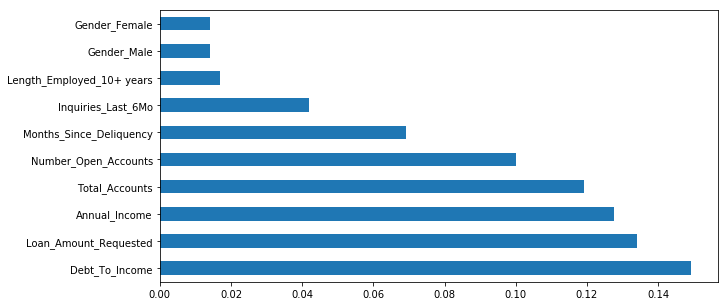

In [191]:
get_feature_importance(RandomForestClassifier(), dfus)

In [130]:
sub.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [108]:
lrpdf = pd.DataFrame(lrp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,lrpdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [193]:
rfpdf = pd.DataFrame(rfp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,rfpdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [56]:
xgpdf = pd.DataFrame(xgp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,xgpdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [140]:
catdf = pd.DataFrame(catp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,catdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [137]:
lgpdf = pd.DataFrame(lgp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,lgpdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [80]:
enpdf = pd.DataFrame(enp)
sub_df = sub['Loan_ID']
sub_df = pd.concat([sub_df,enpdf],axis =1)
sub_df.columns = ['Loan_ID','Interest_Rate']

In [109]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\lr01.csv', index=False)

In [194]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\rf03.csv', index=False)

In [57]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\xg04.csv', index=False)

In [141]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\cat08.csv', index=False)

In [138]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\lgp08.csv', index=False)

In [81]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHack-MLFB\enp01.csv', index=False)